## CSVを読み込む

- `pandas` を使って、CSVを読み込む
- データフレームとして読み込まれる
- `pandas` が無い的なエラーが出たら、ターミナルからインストール
    - `$pip install pandas`
- `read_csv("ファイル名", sep="区切り文字")`

In [1]:
import pandas as pd

# data.csv を読み込む
data = pd.read_csv("data.csv", sep=",")

data

,五教科合計,数学,理科,英語
0,450,100,95,80
1,400,80,90,70
2,350,80,85,60
3,300,50,55,60
4,250,30,50,40


5人の学生の「五教科合計」「数学」「理科」「英語」の点数のデータです(本来ならもっとたくさんの学生のデータが欲しいところですが、例ですので)。

この記事では、以下の線形回帰モデルを推定します。

$$
(五教科合計) = b + a_1 \times (数学) + a_2 \times (理科) + a_3 \times (英語)
$$

## データを分離

次に、変数 `data` (データフレーム)から部分的に抽出します

In [2]:
y = data['五教科合計']
y

0    450
1    400
2    350
3    300
4    250
Name: 五教科合計, dtype: int64

In [3]:
X = data.loc[:,['数学','理科','英語']]
X

,数学,理科,英語
0,100,95,80
1,80,90,70
2,80,85,60
3,50,55,60
4,30,50,40


## 線形回帰モデルを推定

- `skearn` が無いと言われたら、ターミナルを開いてインストール
    - `$pip install scikit-learn`
- `fit(説明変数の行列X, 目的変数のベクトルy)`: 線形回帰モデルを推定

In [4]:
from sklearn import linear_model

model = linear_model.LinearRegression()
 
# 線形回帰モデルを推定
model.fit(X, y)

# 結果を出力
print("回帰係数= ", model.coef_)
print("切片= ", model.intercept_)
print("決定係数= ", model.score(X, y))


回帰係数=  [-0.63897764  2.33226837  3.43450479]
切片=  5.59105431309905
決定係数=  0.9840255591054313


## 誤差の分布を可視化(おまけ)

- `predict(X)` : Xをインプットとして、推定したモデルによる目的変数のベクトルを出力
    - 推定と同じXを使えば、誤差(モデルとデータとのずれ)を計算できる

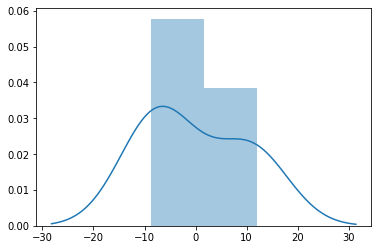

In [10]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

ep = y - model.predict(X)
ep = ep.rename(columns={'五教科合計': 'epsilon'})

# 可視化
sns.distplot(ep)